In [1]:
import re
from sklearn.model_selection import train_test_split
import numpy as np
import DNA_mom_inertia as inertia
import complexity_and_entropy as c_and_e
import time
from Bio.SeqUtils import CodonUsage as bio

# Preprocessing

In [2]:
with open('essentials/fasta_essentials_nt.dat','r') as f:
    e_file = f.read()

In [3]:
len(e_file)

19836083

In [4]:
x = re.split('>(DEG\d+)\n([ATGC\n]+)', e_file)

In [5]:
v = [i.replace('\n','') for i in x]

In [6]:
e_names = []
e_seq = []

for i in v:
    match1= re.search('^[ATGC]+$',i)
    match2= re.search('>?DEG',i)
    if match2:
        if not 'available' in i:
            e_names.append(i)
    else:
        if match1:
            e_seq.append(i)

In [7]:
len(e_names)

18775

In [8]:
len(e_seq)

18775

In [9]:
with open('nonessentials/nonessentials_nt.dat','r') as f1:
    n_file = f1.read()

In [10]:
len(n_file)

125451473

In [11]:
x2 = re.split('>(DNEG\d+)\n([ATGC\n]+)', n_file)

In [12]:
v2 = [i.replace('\n','') for i in x2]

In [13]:
n_names = []
n_seq = []

for i in v2:
    match1= re.search('^[ATGC]+$',i)
    match2= re.search('>?DNEG',i)
    if match2:
        if not 'available' in i:
            n_names.append(i)
    else:
        if match1:
            n_seq.append(i)

In [14]:
len(n_names)

126395

In [15]:
len(n_seq)

126395

# Moments of inertia

In [16]:
e_dim2_desc = []

for elem in e_seq:
    e_inertia = inertia.DNA(elem, dim=2, desc1=False)
    desc = e_inertia.DNA_descriptors()
    e_dim2_desc.append(desc)

In [17]:
len(e_dim2_desc)

18775

In [18]:
e_dim2_desc[0]

array([-3.83613944e-03, -7.94915045e-06])

In [19]:
n_dim2_desc = []

for elem in n_seq:
    n_inertia = inertia.DNA(elem, dim=2, desc1=False)
    desc = e_inertia.DNA_descriptors()
    n_dim2_desc.append(desc)

In [20]:
len(n_dim2_desc)

126395

In [21]:
n_dim2_desc[0]

array([-2.61554822e-04, -9.61222626e-06])

# Entropy and complexity

In [22]:
import importlib
importlib.reload(c_and_e)

<module 'complexity_and_entropy' from 'C:\\Users\\pauli\\OneDrive\\Dokumenty\\Magisterka\\complexity_and_entropy.py'>

In [22]:
e_complexity = []
e_entropy = []

for elem in e_seq:
    e_ce = c_and_e.ComplexityEntropy(elem)
    e_complexity.append(e_ce.K1_complexity())
    e_entropy.append(e_ce.K2_entropy())

C:\Users\pauli\OneDrive\Dokumenty\Magisterka\complexity_and_entropy.py:101: RuntimeWarning: divide by zero encountered in log
  K1_mat = (1/self.L)*np.log(matrix)


In [23]:
len(e_complexity)

18775

In [24]:
len(e_entropy)

18775

In [25]:
e_complexity[0]

[0.5100247849125792,
 0.48768353998120617,
 0.465915581709238,
 0.46622594830015324,
 0.0]

In [26]:
e_entropy[0]

1.3662240820333535

In [27]:
n_complexity = []
n_entropy = []

for elem in n_seq:
    n_ce = c_and_e.ComplexityEntropy(elem)
    n_complexity.append(n_ce.K1_complexity())
    n_entropy.append(n_ce.K2_entropy())

# CAI and A/T, G/C ratios

**CAI**

In [28]:
e_cai = []

seq_cai = bio.CodonAdaptationIndex()

for elem in e_seq:
    
    try:
        cai = seq_cai.cai_for_gene(elem)
        e_cai.append(cai)
        
    except Exception as e:
        
        try:
            cai = seq_cai.cai_for_gene(elem[:-1])
            e_cai.append(cai)
        
        except Exception as e:
            cai = seq_cai.cai_for_gene(elem[:-2])
            e_cai.append(cai)

In [29]:
len(e_cai)

18775

In [30]:
e_cai[0]

0.2377256805617765

In [31]:
n_cai = []

seq_cai = bio.CodonAdaptationIndex()

for elem in n_seq:
    
    try:
        cai = seq_cai.cai_for_gene(elem)
        n_cai.append(cai)
        
    except Exception as e:
        
        try:
            cai = seq_cai.cai_for_gene(elem[:-1])
            n_cai.append(cai)
        
        except Exception as e:
            cai = seq_cai.cai_for_gene(elem[:-2])
            n_cai.append(cai)

In [32]:
n_cai[0]

0.19480273620782487

**A/T, G/C ratios**

In [33]:
def nuc_ratio(seq):
    
    A_num = seq.count('A')
    T_num = seq.count('T')
    C_num = seq.count('C')
    G_num = seq.count('G')
    
    if A_num > 0 and T_num > 0:
        AT_ratio = A_num/T_num
    else:
        AT_ratio = 0
    if G_num > 0 and C_num > 0:
        GC_ratio = G_num/C_num
    else:
        GC_ratio = 0
    
    return [AT_ratio, GC_ratio]

In [34]:
e_ratios = []

for elem in e_seq:
    
    ratios = nuc_ratio(elem)
    e_ratios.append(ratios)

In [35]:
e_ratios[0]

[1.3074712643678161, 0.9925925925925926]

In [36]:
n_ratios = []

for elem in n_seq:
    
    ratios = nuc_ratio(elem)
    n_ratios.append(ratios)

In [37]:
n_ratios[0]

[1.0333333333333334, 1.8484848484848484]

**Spaces between the same nucleotides**

In [38]:
def nuc_mean_spaces(seq, nuc):
    
    space_list = []
    
    sp_count = 0
    for num, name in enumerate(seq):
        
        if name != nuc:
            sp_count += 1
            
        if name == nuc:
            
            prev_name = seq[num-1]
            
            if prev_name != nuc:
                
                if sp_count > 0:
                    space_list.append(sp_count)
                    sp_count = 0
                    
    sp_mean = np.array(space_list).mean()
    
    return sp_mean

In [39]:
e_mean_A = []
e_mean_T = []
e_mean_G = []
e_mean_C = []

for elem in e_seq:

    e_mean_A.append(nuc_mean_spaces(elem, 'A'))
    e_mean_T.append(nuc_mean_spaces(elem, 'T'))
    e_mean_G.append(nuc_mean_spaces(elem, 'G'))
    e_mean_C.append(nuc_mean_spaces(elem, 'C'))

In [40]:
print([e_mean_A[0], e_mean_T[0], e_mean_G[0], e_mean_C[0]])

[3.2181818181818183, 4.308695652173913, 4.9906976744186045, 4.8986175115207375]


In [41]:
n_mean_A = []
n_mean_T = []
n_mean_G = []
n_mean_C = []

for elem in n_seq:

    n_mean_A.append(nuc_mean_spaces(elem, 'A'))
    n_mean_T.append(nuc_mean_spaces(elem, 'T'))
    n_mean_G.append(nuc_mean_spaces(elem, 'G'))
    n_mean_C.append(nuc_mean_spaces(elem, 'C'))

<ipython-input-38-be713aa620cd>:21: RuntimeWarning: Mean of empty slice.
  sp_mean = np.array(space_list).mean()
C:\Users\pauli\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Scatterplot and Correlations

In [42]:
import matplotlib.pyplot as plt

In [43]:
import pandas as pd

**Preparations**

In [44]:
#lists of mean values where necessary - essential genes

e_desc_m = [np.array(elem).mean() for elem in e_dim2_desc]
e_complex_m = [np.array(elem).mean() for elem in e_complexity]
e_ratios_m = [np.array(elem).mean() for elem in e_ratios]

In [45]:
e_desc_m[0]

-0.0019220442950173497

In [46]:
#lists of mean values where necessary - nonessential genes

n_desc_m = [np.array(elem).mean() for elem in n_dim2_desc]
n_complex_m = [np.array(elem).mean() for elem in n_complexity]
n_ratios_m = [np.array(elem).mean() for elem in n_ratios]

**Scatterplots and table**

**Table for essential genes**

In [47]:
df_e = pd.DataFrame()

In [48]:
df_e["moments_of_inertia_desc"] = e_desc_m
df_e["complexity_coefficient"] = e_complex_m
df_e["ratios_of_nucleotides"] = e_ratios_m
df_e["entropy_coefficient"] = e_entropy
df_e["cai"] = e_cai
df_e["mean_spaces_adenine"] = e_mean_A
df_e["mean_spaces_guanine"] = e_mean_G
df_e["mean_spaces_cytosine"] = e_mean_C
df_e["mean_spaces_thymine"] = e_mean_T

In [49]:
df_e.head()

,moments_of_inertia_desc,complexity_coefficient,ratios_of_nucleotides,entropy_coefficient,cai,mean_spaces_adenine,mean_spaces_guanine,mean_spaces_cytosine,mean_spaces_thymine
0,-0.001922,0.385970,1.150032,1.366224,0.237726,3.218182,4.990698,4.898618,4.308696
1,-0.000914,0.374997,1.136748,1.367846,0.267721,3.295652,4.623711,5.067039,4.093596
2,-0.000924,0.410421,1.302521,1.373966,0.280352,3.313625,4.133903,4.586626,4.914191
3,-0.000473,0.427297,1.274711,1.374730,0.280261,3.316832,4.041037,4.558411,4.301370
4,-0.001419,0.392608,1.243855,1.375886,0.302221,3.526502,4.025735,4.702811,4.384921


**Table with correlation coefficients for essential genes**

In [50]:
df_e.corr()

,moments_of_inertia_desc,complexity_coefficient,ratios_of_nucleotides,entropy_coefficient,cai,mean_spaces_adenine,mean_spaces_guanine,mean_spaces_cytosine,mean_spaces_thymine
moments_of_inertia_desc,1.000000,0.167208,-0.359517,0.038840,0.120023,0.568058,-0.560892,-0.498775,0.399839
complexity_coefficient,0.167208,1.000000,-0.164514,-0.113887,0.033062,0.100868,-0.118291,-0.130300,0.083565
ratios_of_nucleotides,-0.359517,-0.164514,1.000000,-0.144784,-0.029471,-0.598057,0.204309,0.592625,-0.081311
entropy_coefficient,0.038840,-0.113887,-0.144784,1.000000,0.320388,-0.182000,-0.204872,-0.262017,-0.264433
cai,0.120023,0.033062,-0.029471,0.320388,1.000000,0.182644,-0.372613,-0.366417,0.194530
mean_spaces_adenine,0.568058,0.100868,-0.598057,-0.182000,0.182644,1.000000,-0.724583,-0.743187,0.624467
mean_spaces_guanine,-0.560892,-0.118291,0.204309,-0.204872,-0.372613,-0.724583,1.000000,0.773546,-0.679406
mean_spaces_cytosine,-0.498775,-0.130300,0.592625,-0.262017,-0.366417,-0.743187,0.773546,1.000000,-0.694556
mean_spaces_thymine,0.399839,0.083565,-0.081311,-0.264433,0.194530,0.624467,-0.679406,-0.694556,1.000000


In [58]:
print(df_e.corr().to_latex(index=True, multirow=True, columns=['moments_of_inertia_desc','complexity_coefficient','ratios_of_nucleotides']))

\begin{tabular}{lrrr}
\toprule
{} &  moments\_of\_inertia\_desc &  complexity\_coefficient &  ratios\_of\_nucleotides \\
\midrule
moments\_of\_inertia\_desc &                 1.000000 &                0.167208 &              -0.359517 \\
complexity\_coefficient  &                 0.167208 &                1.000000 &              -0.164514 \\
ratios\_of\_nucleotides   &                -0.359517 &               -0.164514 &               1.000000 \\
entropy\_coefficient     &                 0.038840 &               -0.113887 &              -0.144784 \\
cai                     &                 0.120023 &                0.033062 &              -0.029471 \\
mean\_spaces\_adenine     &                 0.568058 &                0.100868 &              -0.598057 \\
mean\_spaces\_guanine     &                -0.560892 &               -0.118291 &               0.204309 \\
mean\_spaces\_cytosine    &                -0.498775 &               -0.130300 &               0.592625 \\
mean\_spaces\_thy

In [62]:
print(df_e.corr().to_latex(index=True, multirow=True, columns=["entropy_coefficient","cai","mean_spaces_adenine"]))

\begin{tabular}{lrrr}
\toprule
{} &  entropy\_coefficient &       cai &  mean\_spaces\_adenine \\
\midrule
moments\_of\_inertia\_desc &             0.038840 &  0.120023 &             0.568058 \\
complexity\_coefficient  &            -0.113887 &  0.033062 &             0.100868 \\
ratios\_of\_nucleotides   &            -0.144784 & -0.029471 &            -0.598057 \\
entropy\_coefficient     &             1.000000 &  0.320388 &            -0.182000 \\
cai                     &             0.320388 &  1.000000 &             0.182644 \\
mean\_spaces\_adenine     &            -0.182000 &  0.182644 &             1.000000 \\
mean\_spaces\_guanine     &            -0.204872 & -0.372613 &            -0.724583 \\
mean\_spaces\_cytosine    &            -0.262017 & -0.366417 &            -0.743187 \\
mean\_spaces\_thymine     &            -0.264433 &  0.194530 &             0.624467 \\
\bottomrule
\end{tabular}



In [63]:
print(df_e.corr().to_latex(index=True, multirow=True, columns=["mean_spaces_guanine","mean_spaces_cytosine","mean_spaces_thymine"]))

\begin{tabular}{lrrr}
\toprule
{} &  mean\_spaces\_guanine &  mean\_spaces\_cytosine &  mean\_spaces\_thymine \\
\midrule
moments\_of\_inertia\_desc &            -0.560892 &             -0.498775 &             0.399839 \\
complexity\_coefficient  &            -0.118291 &             -0.130300 &             0.083565 \\
ratios\_of\_nucleotides   &             0.204309 &              0.592625 &            -0.081311 \\
entropy\_coefficient     &            -0.204872 &             -0.262017 &            -0.264433 \\
cai                     &            -0.372613 &             -0.366417 &             0.194530 \\
mean\_spaces\_adenine     &            -0.724583 &             -0.743187 &             0.624467 \\
mean\_spaces\_guanine     &             1.000000 &              0.773546 &            -0.679406 \\
mean\_spaces\_cytosine    &             0.773546 &              1.000000 &            -0.694556 \\
mean\_spaces\_thymine     &            -0.679406 &             -0.694556 &             1.

In [60]:
df_e.corr().to_csv('corr_matrix_features_lr.csv', sep='\t')

In [61]:
df_e.corr().to_csv('corr_matrix_features_lr2.csv')

In [52]:
e_corr_mat = df_e.corr()

# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null - duplicates removal
upper_corr_mat = e_corr_mat.where(
    np.triu(np.ones(e_corr_mat.shape), k=1).astype(np.bool))

sorted_mat = upper_corr_mat.abs().unstack().dropna().sort_values()

In [53]:
sorted_mat #which ones works best with each other (not correlating!)

cai                     ratios_of_nucleotides      0.029471
                        complexity_coefficient     0.033062
entropy_coefficient     moments_of_inertia_desc    0.038840
mean_spaces_thymine     ratios_of_nucleotides      0.081311
                        complexity_coefficient     0.083565
mean_spaces_adenine     complexity_coefficient     0.100868
entropy_coefficient     complexity_coefficient     0.113887
mean_spaces_guanine     complexity_coefficient     0.118291
cai                     moments_of_inertia_desc    0.120023
mean_spaces_cytosine    complexity_coefficient     0.130300
entropy_coefficient     ratios_of_nucleotides      0.144784
ratios_of_nucleotides   complexity_coefficient     0.164514
complexity_coefficient  moments_of_inertia_desc    0.167208
mean_spaces_adenine     entropy_coefficient        0.182000
                        cai                        0.182644
mean_spaces_thymine     cai                        0.194530
mean_spaces_guanine     ratios_of_nucleo

Closest to zero: complexity + moments of inertia + cai + entropy + ratios_of_nuc (working best with each other)

**Sample scatterplots for essential genes**

No handles with labels found to put in legend.


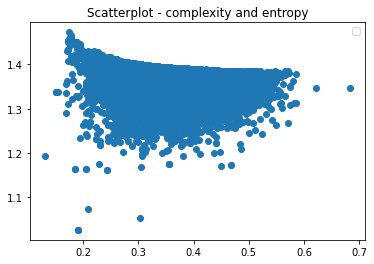

In [54]:
plt.scatter(e_complex_m, e_entropy)

plt.title('Scatterplot - complexity and entropy')
plt.legend()
plt.show()

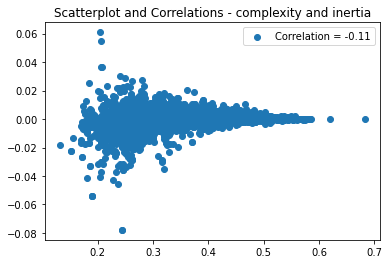

In [90]:
plt.scatter(e_complex_m, e_dim2_desc, label=f'Correlation = {np.round(np.corrcoef(e_complexity,e_entropy)[0,1], 2)}')

plt.title('Scatterplot and Correlations - complexity and inertia')
plt.legend()
plt.show()

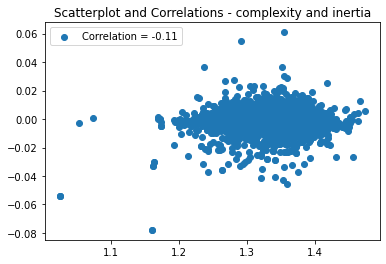

In [91]:
plt.scatter(e_entropy, e_dim2_desc, label=f'Correlation = {np.round(np.corrcoef(e_complexity,e_entropy)[0,1], 2)}')

plt.title('Scatterplot and Correlations - complexity and inertia')
plt.legend()
plt.show()

# Neural network - logistic regression

**Preparations**

In [55]:
import random
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [56]:
e_len = len(e_seq)
n_len = len(n_seq)

Creating a few different sets with different features which will be later used in separate neural networks.

In [57]:
e_feat_l1 = []
e_feat_l2 = []
e_feat_l3 = []
e_feat_l4 = []
e_feat_l5 = []

for i in range(e_len):
    a = [e_desc_m[i], e_complex_m[i], e_ratios_m[i], e_entropy[i], e_cai[i]]
    e_feat_l1.append(a)
    b = [e_cai[i], e_ratios_m[i], e_complex_m[i], e_desc_m[i], e_mean_T[i]]
    e_feat_l2.append(b)
    c = [e_entropy[i], e_desc_m[i], e_mean_T[i]]
    e_feat_l3.append(c)
    d = [e_desc_m[i], e_complex_m[i], e_ratios_m[i], e_entropy[i], e_cai[i], e_mean_A[i], e_mean_G[i]]
    e_feat_l4.append(d)
    e = [e_desc_m[i], e_complex_m[i], e_ratios_m[i], e_entropy[i], e_cai[i], e_mean_T[i], e_mean_A[i], e_mean_C[i], e_mean_G[i]]
    e_feat_l5.append(e)

n_feat_l1 = []
n_feat_l2 = []
n_feat_l3 = []
n_feat_l4 = []
n_feat_l5 = []

for j in range(n_len):
    a = [n_desc_m[j], n_complex_m[j], n_ratios_m[j], n_entropy[j], n_cai[j]]
    n_feat_l1.append(a)
    b = [n_cai[j], n_ratios_m[j], n_complex_m[j], n_desc_m[j], n_mean_T[j]]
    n_feat_l2.append(b)
    c = [n_entropy[j], n_desc_m[j], n_mean_T[j]]
    n_feat_l3.append(c)
    d = [n_desc_m[j], n_complex_m[j], n_ratios_m[j], n_entropy[j], n_cai[j], n_mean_A[j], n_mean_G[j]]
    n_feat_l4.append(d)
    e = [n_desc_m[j], n_complex_m[j], n_ratios_m[j], n_entropy[j], n_cai[j], n_mean_T[j], n_mean_A[j], n_mean_C[j], n_mean_G[j]]
    n_feat_l5.append(e)

In [58]:
e_feat_l1[0]

[-0.0019220442950173497,
 0.38596997098063535,
 1.1500319284802043,
 1.3662240820333535,
 0.2377256805617765]

In [59]:
random.shuffle(n_feat_l1)
new_nf1 = n_feat_l1[:e_len]
X1 = new_nf1+e_feat_l1

random.shuffle(n_feat_l2)
new_nf2 = n_feat_l2[:e_len]
X2 = new_nf2+e_feat_l2

random.shuffle(n_feat_l3)
new_nf3 = n_feat_l3[:e_len]
X3 = new_nf3+e_feat_l3

random.shuffle(n_feat_l4)
new_nf4 = n_feat_l4[:e_len]
X4 = new_nf4+e_feat_l4

random.shuffle(n_feat_l5)
new_nf5 = n_feat_l5[:e_len]
X5 = new_nf5+e_feat_l5

X1 = np.array(X1)
X2 = np.array(X2)
X3 = np.array(X3)
X4 = np.array(X4)
X5 = np.array(X5)

e_cat = np.ones(e_len)
n_cat = np.zeros(n_len)

y = e_cat.tolist() + n_cat[:e_len].tolist()
y = np.array(y)

In [60]:
X1[0]

array([-1.35583524e-04,  2.85728049e-01,  1.18923611e+00,  1.37455685e+00,
        1.93863590e-01])

**Neural network model**

In [95]:
class Model(nn.Module):
    def __init__(self, n_input_features):
        super().__init__()
        self.linear = nn.Linear(n_input_features, 1) 
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x)) 
        return y_pred

# **List 1: entropy, moments of inertia, complexity, ratios A/T G/C, CAI**

In [62]:
n_samples, n_features = X1.shape

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=1234)

#normalizacja danych
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#zmiana typu - na obiekty typu torch
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

#zmiana wymiaru wektora kategorii
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [63]:
model = Model(n_features)

In [64]:
num_epochs = 10000
learning_rate = 0.03
loss_function = nn.BCELoss() #binary cross-entropy 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


list_of_epoch = [1,2,5,10,50,100,1000, 10000]

#Trenowanie
for epoch in range(num_epochs):
    y_pred = model(X_train)
    loss = loss_function(y_pred, y_train)

    loss.backward()
    optimizer.step()

    optimizer.zero_grad()
        
    if (epoch+1) in list_of_epoch:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

    with torch.no_grad():
        y_pred_cls = y_pred.round()
        acc = y_pred_cls.eq(y_train).sum() / float(y_train.shape[0])
        if (epoch+1) in list_of_epoch:
            print(f'epoch: {epoch+1}, accuracy: {acc.item():.4f}')


epoch: 1, loss = 0.7790
epoch: 1, accuracy: 0.5432
epoch: 2, loss = 0.7770
epoch: 2, accuracy: 0.5457
epoch: 5, loss = 0.7712
epoch: 5, accuracy: 0.5519
epoch: 10, loss = 0.7619
epoch: 10, accuracy: 0.5616
epoch: 50, loss = 0.7053
epoch: 50, accuracy: 0.6254
epoch: 100, loss = 0.6667
epoch: 100, accuracy: 0.6298
epoch: 1000, loss = 0.6324
epoch: 1000, accuracy: 0.6327
epoch: 10000, loss = 0.6324
epoch: 10000, accuracy: 0.6325


**What feature is the most important for this neural network?**

In [65]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.1105, -0.0408, -0.4490,  0.0151, -0.5874]])),
             ('linear.bias', tensor([-0.0106]))])

In [76]:
desc_l = []
complexity_l = []
ratios_l = []
entropy_l = []
cai_l = []

for [desc, complexity, ratios, entropy, cai] in X_train:
    desc_l.append(desc)
    complexity_l.append(complexity)
    ratios_l.append(ratios)
    entropy_l.append(entropy)
    cai_l.append(cai)

desc_l_std = np.array(desc_l).std()
complexity_l_std = np.array(complexity_l).std()
ratios_l_std = np.array(ratios_l).std()
entropy_l_std = np.array(entropy_l).std()
cai_l_std = np.array(cai_l).std()

In [74]:
desc_net = model.state_dict()['linear.weight'][0][0]
complex_net = model.state_dict()['linear.weight'][0][1]
ratios_net = model.state_dict()['linear.weight'][0][2]
entropy_net = model.state_dict()['linear.weight'][0][3]
cai_net = model.state_dict()['linear.weight'][0][4]

In [78]:
desc_wei = desc_net*desc_l_std
complex_wei = complex_net*complexity_l_std
ratios_wei = ratios_net*ratios_l_std
entropy_wei = entropy_net*entropy_l_std
cai_wei = cai_net*cai_l_std

print('Updated linear weights from neural network:\n moments\' of inertia descriptors: {},\n complexity of a sequence: {},\n ratios A/T and G/C of a sequence: {},\n entropy of a sequence: {},\n CAI of a sequence: {}'.format(desc_wei, complex_wei, ratios_wei, entropy_wei, cai_wei))

Updated linear weights from neural network:
 moments' of inertia descriptors: -0.11052517592906952,
 complexity of a sequence: -0.040805358439683914,
 ratios A/T and G/C of a sequence: -0.44902271032333374,
 entropy of a sequence: 0.01510620303452015,
 CAI of a sequence: -0.5874271988868713


# **List 2: mean spaces between thymines, moments of inertia, complexity, ratios A/T G/C, CAI**

In [80]:
n_samples, n_features = X2.shape

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=1234)

#normalizacja danych
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#zmiana typu - na obiekty typu torch
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

#zmiana wymiaru wektora kategorii
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [81]:
model = Model(n_features)

In [82]:
num_epochs = 10000
learning_rate = 0.03
loss_function = nn.BCELoss() #binary cross-entropy 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


list_of_epoch = [1,2,5,10,50,100,1000, 10000]

#Trenowanie
for epoch in range(num_epochs):
    y_pred = model(X_train)
    loss = loss_function(y_pred, y_train)

    loss.backward()
    optimizer.step()

    optimizer.zero_grad()
        
    if (epoch+1) in list_of_epoch:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

    with torch.no_grad():
        y_pred_cls = y_pred.round()
        acc = y_pred_cls.eq(y_train).sum() / float(y_train.shape[0])
        if (epoch+1) in list_of_epoch:
            print(f'epoch: {epoch+1}, accuracy: {acc.item():.4f}')

epoch: 1, loss = 0.6832
epoch: 1, accuracy: 0.5547
epoch: 2, loss = 0.6824
epoch: 2, accuracy: 0.5558
epoch: 5, loss = 0.6800
epoch: 5, accuracy: 0.5580
epoch: 10, loss = 0.6761
epoch: 10, accuracy: 0.5615
epoch: 50, loss = 0.6529
epoch: 50, accuracy: 0.5853
epoch: 100, loss = 0.6362
epoch: 100, accuracy: 0.6118
epoch: 1000, loss = 0.6123
epoch: 1000, accuracy: 0.6599
epoch: 10000, loss = 0.6122
epoch: 10000, accuracy: 0.6607


**What feature is the most important for this neural network?**

In [83]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.7324, -0.5193, -0.0490, -0.2482,  0.4350]])),
             ('linear.bias', tensor([-0.0251]))])

In [84]:
cai_l = []
ratios_l = []
complex_l = []
desc_l = []
mean_T_l = []

for [cai, ratios, complexity, desc, mean_T] in X_train:
    cai_l.append(cai)
    ratios_l.append(ratios)
    complex_l.append(complexity)
    desc_l.append(desc)
    mean_T_l.append(mean_T)


desc_l_std = np.array(desc_l).std()
complexity_l_std = np.array(complex_l).std()
ratios_l_std = np.array(ratios_l).std()
mean_T_std = np.array(mean_T_l).std()
cai_l_std = np.array(cai_l).std()

In [85]:
cai_net = model.state_dict()['linear.weight'][0][0]
ratios_net = model.state_dict()['linear.weight'][0][1]
complex_net = model.state_dict()['linear.weight'][0][2]
desc_net = model.state_dict()['linear.weight'][0][3]
mean_T_net = model.state_dict()['linear.weight'][0][4]

In [87]:
desc_wei = desc_net*desc_l_std
complex_wei = complex_net*complexity_l_std
ratios_wei = ratios_net*ratios_l_std
mean_T_wei = mean_T_net*mean_T_std
cai_wei = cai_net*cai_l_std

print('Updated linear weights from neural network:\n moments\' of inertia descriptors: {},\n complexity of a sequence: {},\n ratios A/T and G/C of a sequence: {},\n mean spaces between thymines in a sequence: {},\n CAI of a sequence: {}'.format(desc_wei, complex_wei, ratios_wei, mean_T_wei, cai_wei))

Updated linear weights from neural network:
 moments' of inertia descriptors: -0.24820813536643982,
 complexity of a sequence: -0.04899732396006584,
 ratios A/T and G/C of a sequence: -0.5193230509757996,
 mean spaces between thymines in a sequence: 0.43502238392829895,
 CAI of a sequence: -0.7323585152626038


# **List 3: entropy, moments of inertia, mean spaces between thymines**

In [88]:
n_samples, n_features = X3.shape

X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=1234)

#normalizacja danych
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#zmiana typu - na obiekty typu torch
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

#zmiana wymiaru wektora kategorii
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [89]:
model = Model(n_features)

In [90]:
num_epochs = 10000
learning_rate = 0.03
loss_function = nn.BCELoss() #binary cross-entropy 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


list_of_epoch = [1,2,5,10,50,100,1000, 10000]

#Trenowanie
for epoch in range(num_epochs):
    y_pred = model(X_train)
    loss = loss_function(y_pred, y_train)

    loss.backward()
    optimizer.step()

    optimizer.zero_grad()
        
    if (epoch+1) in list_of_epoch:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

    with torch.no_grad():
        y_pred_cls = y_pred.round()
        acc = y_pred_cls.eq(y_train).sum() / float(y_train.shape[0])
        if (epoch+1) in list_of_epoch:
            print(f'epoch: {epoch+1}, accuracy: {acc.item():.4f}')

epoch: 1, loss = 0.7509
epoch: 1, accuracy: 0.5104
epoch: 2, loss = 0.7501
epoch: 2, accuracy: 0.5104
epoch: 5, loss = 0.7477
epoch: 5, accuracy: 0.5101
epoch: 10, loss = 0.7439
epoch: 10, accuracy: 0.5100
epoch: 50, loss = 0.7208
epoch: 50, accuracy: 0.5088
epoch: 100, loss = 0.7050
epoch: 100, accuracy: 0.5077
epoch: 1000, loss = 0.6891
epoch: 1000, accuracy: 0.5538
epoch: 10000, loss = 0.6891
epoch: 10000, accuracy: 0.5540


**What feature is the most important for this neural network?**

In [91]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[ 0.0194, -0.1110,  0.1847]])),
             ('linear.bias', tensor([-0.0018]))])

In [92]:
entropy_l = []
desc_l = []
mean_T_l = []

for [entropy, desc, mean_T] in X_train:
    entropy_l.append(entropy)
    desc_l.append(desc)
    mean_T_l.append(mean_T)


desc_l_std = np.array(desc_l).std()
mean_T_std = np.array(mean_T_l).std()
entropy_l_std = np.array(entropy_l).std()

In [93]:
entropy_net = model.state_dict()['linear.weight'][0][0]
desc_net = model.state_dict()['linear.weight'][0][1]
mean_T_net = model.state_dict()['linear.weight'][0][2]

In [94]:
desc_wei = desc_net*desc_l_std
mean_T_wei = mean_T_net*mean_T_std
entropy_wei = entropy_net*entropy_l_std

print('Updated linear weights from neural network:\n moments\' of inertia descriptors: {},\n mean spaces between thymines in a sequence: {},\n entropy of a sequence: {}'.format(desc_wei, mean_T_wei, entropy_wei))

Updated linear weights from neural network:
 moments' of inertia descriptors: -0.1110008955001831,
 mean spaces between thymines in a sequence: 0.1847081482410431,
 entropy of a sequence: 0.019402071833610535


# **List 4: all features except mean spaces between cytosines and thymines**

In [109]:
n_samples, n_features = X4.shape

X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.2, random_state=1234)

#normalizacja danych
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#zmiana typu - na obiekty typu torch
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

#zmiana wymiaru wektora kategorii
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [110]:
model = Model(n_features)

In [111]:
num_epochs = 10000
learning_rate = 0.03
loss_function = nn.BCELoss() #binary cross-entropy 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


list_of_epoch = [1,2,5,10,50,100,1000, 10000]

#Trenowanie
for epoch in range(num_epochs):
    y_pred = model(X_train)
    loss = loss_function(y_pred, y_train)

    loss.backward()
    optimizer.step()

    optimizer.zero_grad()
        
    if (epoch+1) in list_of_epoch:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

    with torch.no_grad():
        y_pred_cls = y_pred.round()
        acc = y_pred_cls.eq(y_train).sum() / float(y_train.shape[0])
        if (epoch+1) in list_of_epoch:
            print(f'epoch: {epoch+1}, accuracy: {acc.item():.4f}')

epoch: 1, loss = 0.7293
epoch: 1, accuracy: 0.4968
epoch: 2, loss = 0.7281
epoch: 2, accuracy: 0.4984
epoch: 5, loss = 0.7245
epoch: 5, accuracy: 0.5024
epoch: 10, loss = 0.7187
epoch: 10, accuracy: 0.5082
epoch: 50, loss = 0.6848
epoch: 50, accuracy: 0.5597
epoch: 100, loss = 0.6613
epoch: 100, accuracy: 0.6005
epoch: 1000, loss = 0.6240
epoch: 1000, accuracy: 0.6440
epoch: 10000, loss = 0.6236
epoch: 10000, accuracy: 0.6449


**What feature is the most important for this neural network?**

In [112]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.2312, -0.0707, -0.5083, -0.0655, -0.7396, -0.1231, -0.4496]])),
             ('linear.bias', tensor([-0.0237]))])

In [113]:
desc_l = []
complex_l = []
ratios_l = []
entropy_l = []
cai_l = []
mean_A_l = []
mean_G_l = []

for [desc, complexity, ratios, entropy, cai, mean_A, mean_G] in X_train:
    desc_l.append(desc)
    complex_l.append(complexity)
    ratios_l.append(ratios)
    entropy_l.append(entropy)
    cai_l.append(cai)
    mean_A_l.append(mean_A)
    mean_G_l.append(mean_G)


desc_l_std = np.array(desc_l).std()
complexity_l_std = np.array(complex_l).std()
ratios_l_std = np.array(ratios_l).std()
mean_A_std = np.array(mean_A_l).std()
mean_G_std = np.array(mean_G_l).std()
cai_l_std = np.array(cai_l).std()
entropy_l_std = np.array(entropy_l).std()

In [114]:
desc_net = model.state_dict()['linear.weight'][0][0]
complex_net = model.state_dict()['linear.weight'][0][1]
ratios_net = model.state_dict()['linear.weight'][0][2]
entropy_net = model.state_dict()['linear.weight'][0][3]
cai_net = model.state_dict()['linear.weight'][0][4]
mean_A_net = model.state_dict()['linear.weight'][0][5]
mean_G_net = model.state_dict()['linear.weight'][0][6]

In [116]:
desc_wei = desc_net*desc_l_std
complex_wei = complex_net*complexity_l_std
ratios_wei = ratios_net*ratios_l_std
mean_A_wei = mean_A_net*mean_A_std
mean_G_wei = mean_G_net*mean_G_std
cai_wei = cai_net*cai_l_std
entropy_wei = entropy_net*entropy_l_std

print('Updated linear weights from neural network:\n moments\' of inertia descriptors: {},\n complexity of a sequence: {},\n ratios A/T and G/C of a sequence: {},\n mean spaces between adenines in a sequence: {},\n mean spaces between guanines in a sequence: {},\n CAI of a sequence: {},\n entropy of a sequence {}'.format(desc_wei, complex_wei, ratios_wei, mean_A_wei, mean_G_wei, cai_wei, entropy_wei))

Updated linear weights from neural network:
 moments' of inertia descriptors: -0.23120538890361786,
 complexity of a sequence: -0.07071498036384583,
 ratios A/T and G/C of a sequence: -0.5082591772079468,
 mean spaces between adenines in a sequence: -0.12312116473913193,
 mean spaces between guanines in a sequence: -0.44958198070526123,
 CAI of a sequence: -0.7395674586296082,
 entropy of a sequence -0.06553258746862411


# **List 5: all features**

In [117]:
n_samples, n_features = X5.shape

X_train, X_test, y_train, y_test = train_test_split(X5, y, test_size=0.2, random_state=1234)

#normalizacja danych
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#zmiana typu - na obiekty typu torch
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

#zmiana wymiaru wektora kategorii
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [118]:
model = Model(n_features)

In [119]:
num_epochs = 10000
learning_rate = 0.03
loss_function = nn.BCELoss() #binary cross-entropy 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


list_of_epoch = [1,2,5,10,50,100,1000, 10000]

#Trenowanie
for epoch in range(num_epochs):
    y_pred = model(X_train)
    loss = loss_function(y_pred, y_train)

    loss.backward()
    optimizer.step()

    optimizer.zero_grad()
        
    if (epoch+1) in list_of_epoch:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

    with torch.no_grad():
        y_pred_cls = y_pred.round()
        acc = y_pred_cls.eq(y_train).sum() / float(y_train.shape[0])
        if (epoch+1) in list_of_epoch:
            print(f'epoch: {epoch+1}, accuracy: {acc.item():.4f}')

epoch: 1, loss = 0.7595
epoch: 1, accuracy: 0.5358
epoch: 2, loss = 0.7559
epoch: 2, accuracy: 0.5392
epoch: 5, loss = 0.7458
epoch: 5, accuracy: 0.5468
epoch: 10, loss = 0.7306
epoch: 10, accuracy: 0.5574
epoch: 50, loss = 0.6624
epoch: 50, accuracy: 0.6051
epoch: 100, loss = 0.6343
epoch: 100, accuracy: 0.6370
epoch: 1000, loss = 0.6088
epoch: 1000, accuracy: 0.6666
epoch: 10000, loss = 0.6088
epoch: 10000, accuracy: 0.6664


**What feature is the most important for this neural network?**

In [120]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.2635, -0.0293, -0.3549,  0.1685, -0.8149,  0.3868,  0.0230, -0.2559,
                        0.0902]])),
             ('linear.bias', tensor([-0.0262]))])

In [121]:
desc_l = []
complex_l = []
ratios_l = []
entropy_l = []
cai_l = []
mean_T_l = []
mean_A_l = []
mean_C_l = []
mean_G_l = []

for [desc, complexity, ratios, entropy, cai, mean_T, mean_A, mean_C, mean_G] in X_train:
    desc_l.append(desc)
    complex_l.append(complexity)
    ratios_l.append(ratios)
    entropy_l.append(entropy)
    cai_l.append(cai)
    mean_A_l.append(mean_A)
    mean_G_l.append(mean_G)
    mean_T_l.append(mean_T)
    mean_C_l.append(mean_C)


desc_l_std = np.array(desc_l).std()
complexity_l_std = np.array(complex_l).std()
ratios_l_std = np.array(ratios_l).std()
mean_A_std = np.array(mean_A_l).std()
mean_G_std = np.array(mean_G_l).std()
mean_C_std = np.array(mean_C_l).std()
mean_T_std = np.array(mean_T_l).std()
cai_l_std = np.array(cai_l).std()
entropy_l_std = np.array(entropy_l).std()

In [122]:
desc_net = model.state_dict()['linear.weight'][0][0]
complex_net = model.state_dict()['linear.weight'][0][1]
ratios_net = model.state_dict()['linear.weight'][0][2]
entropy_net = model.state_dict()['linear.weight'][0][3]
cai_net = model.state_dict()['linear.weight'][0][4]
mean_T_net = model.state_dict()['linear.weight'][0][5]
mean_A_net = model.state_dict()['linear.weight'][0][6]
mean_C_net = model.state_dict()['linear.weight'][0][7]
mean_G_net = model.state_dict()['linear.weight'][0][8]

In [124]:
desc_wei = desc_net*desc_l_std
complex_wei = complex_net*complexity_l_std
ratios_wei = ratios_net*ratios_l_std
mean_A_wei = mean_A_net*mean_A_std
mean_G_wei = mean_G_net*mean_G_std
mean_T_wei = mean_T_net*mean_T_std
mean_C_wei = mean_C_net*mean_C_std
cai_wei = cai_net*cai_l_std
entropy_wei = entropy_net*entropy_l_std

print('Updated linear weights from neural network:\n moments\' of inertia descriptors: {},\n complexity of a sequence: {},\n ratios A/T and G/C of a sequence: {},\n mean spaces between adenines in a sequence: {},\n mean spaces between guanines in a sequence: {},\n mean spaces between thymines in a sequence: {},\n mean spaces between cytosines in a sequence: {},\n CAI of a sequence: {},\n entropy of a sequence {}'.format(desc_wei, complex_wei, ratios_wei, mean_A_wei, mean_G_wei, mean_T_wei, mean_C_wei, cai_wei, entropy_wei))

Updated linear weights from neural network:
 moments' of inertia descriptors: -0.2635487914085388,
 complexity of a sequence: -0.029326550662517548,
 ratios A/T and G/C of a sequence: -0.35487258434295654,
 mean spaces between adenines in a sequence: 0.02300909347832203,
 mean spaces between guanines in a sequence: 0.09024155139923096,
 mean spaces between thymines in a sequence: 0.3868311047554016,
 mean spaces between cytosines in a sequence: -0.25589653849601746,
 CAI of a sequence: -0.8148660063743591,
 entropy of a sequence 0.1684950739145279
